<a href="https://colab.research.google.com/github/AcerPing/AceTibaMe/blob/master/classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !ls -al
!python --version

Python 3.7.7


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
import pandas as pd
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["target"]=iris["target"]
df.to_csv("iris.csv",encoding="utf-8",index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


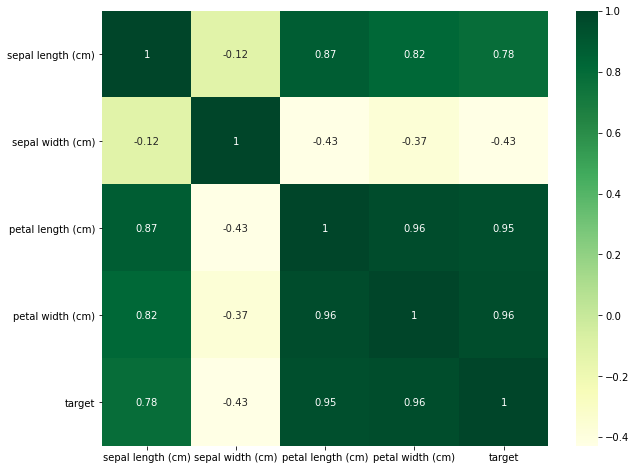

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#如果有圖直接顯示出來
# sns.heatmap(df.astype("float").corr()) 
plt.figure(figsize=(10,8))
# sns.heatmap(df.astype("float").corr(),annot=True) 
sns.heatmap(df.astype("float").corr(),cmap="YlGn",annot=True) 
#熱度圖

In [5]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
#(有看過的資料)做出公式 → (沒看過的資料)驗證一下公式的好壞
from sklearn.model_selection import train_test_split
#train_test_split → (特徵90%,特徵10%,目標90%,目標10%)
#(90%題目,10%題目,90%答案,10%答案)
x_train,x_test,y_train,y_test = train_test_split(df.drop(["target"],axis=1),df["target"],test_size=0.1)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

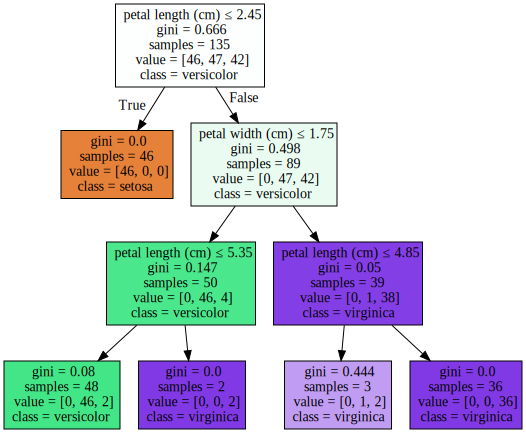

In [9]:
import graphviz
from sklearn.tree import  export_graphviz
g = export_graphviz(clf,out_file=None,feature_names = iris["feature_names"],class_names = iris["target_names"],filled=True,special_characters=True)
graph = graphviz.Source(g)
graph

In [10]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print("預測結果:",list(pre))
print("真正標籤:",list(y_test))
accuracy_score(pre, y_test)

預測結果: [2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0]
真正標籤: [2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0]


0.9333333333333333

In [11]:
#驗證一下公式的好壞
#預測(predict)
print("預測結果:",list(clf.predict(x_test)))
print("真正標籤:",list(y_test))
#衡量方法(sklearn.metrics)
from sklearn.metrics import accuracy_score
score = accuracy_score(clf.predict(x_test),y_test)
print("正確率:",score)

預測結果: [2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0]
真正標籤: [2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0]
正確率: 0.9333333333333333


In [12]:
from sklearn.metrics import accuracy_score
print("預測成功的機率:",accuracy_score(pre,y_test))

預測成功的機率: 0.9333333333333333


In [13]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2
0,4,0,0
1,0,3,0
2,0,1,7


In [14]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# iris["feature_names"]
# iris["data"]
df = pd.DataFrame(iris["data"],
                  columns = iris["feature_names"])
df["answer"] = iris["target"]
df.to_csv("iris.csv",encoding="utf-8",index=False)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
from sklearn.model_selection import train_test_split
#train_test_split → (特徵90%,特徵10%,目標90%,目標10%)
#[90% data, 10% data, 90% target, 10% target]
x_train,x_test, y_train, y_test=train_test_split(iris["data"],
                        iris["target"],
                        test_size=0.1)


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

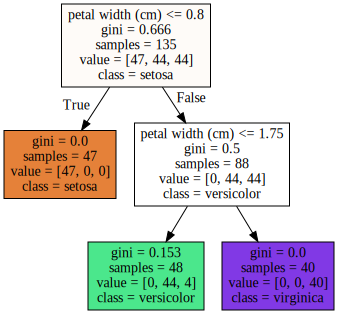

In [17]:
import graphviz
from sklearn.tree import  export_graphviz
g = export_graphviz(clf,
                feature_names = iris["feature_names"],
                class_names = iris["target_names"],
                filled=True)
graphviz.Source(g)

In [18]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

0.8666666666666667